In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np


In [ ]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Print dataset size
print("Dataset Size:")
print("Total number of samples:", len(x_train) + len(x_test))

# Print training data size
print("\nTraining Data Size:")
print("Number of training samples:", len(x_train))

# Print test data size
print("\nTest Data Size:")
print("Number of test samples:", len(x_test))

Dataset Size:
Total number of samples: 70000

Training Data Size:
Number of training samples: 60000

Test Data Size:
Number of test samples: 10000


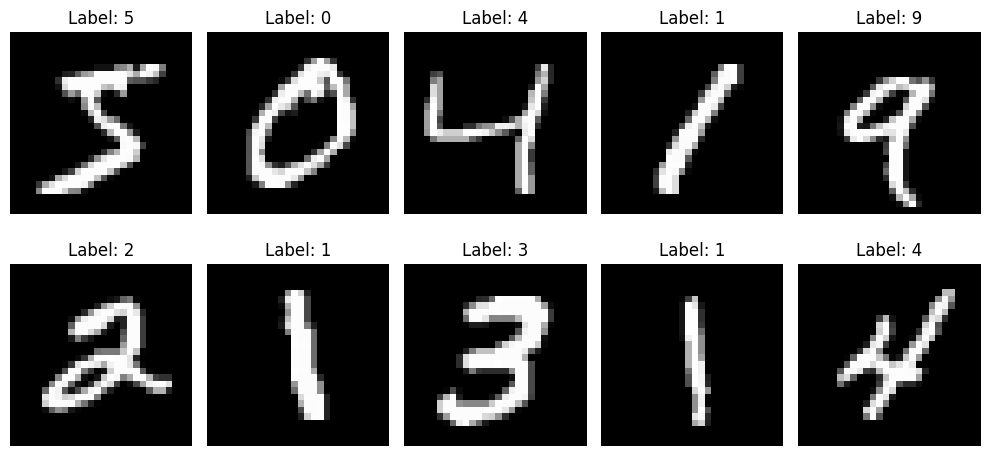

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Plot sample images from training dataset
plt.figure(figsize=(10, 5))
for i in range(10):  # Plot 10 samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


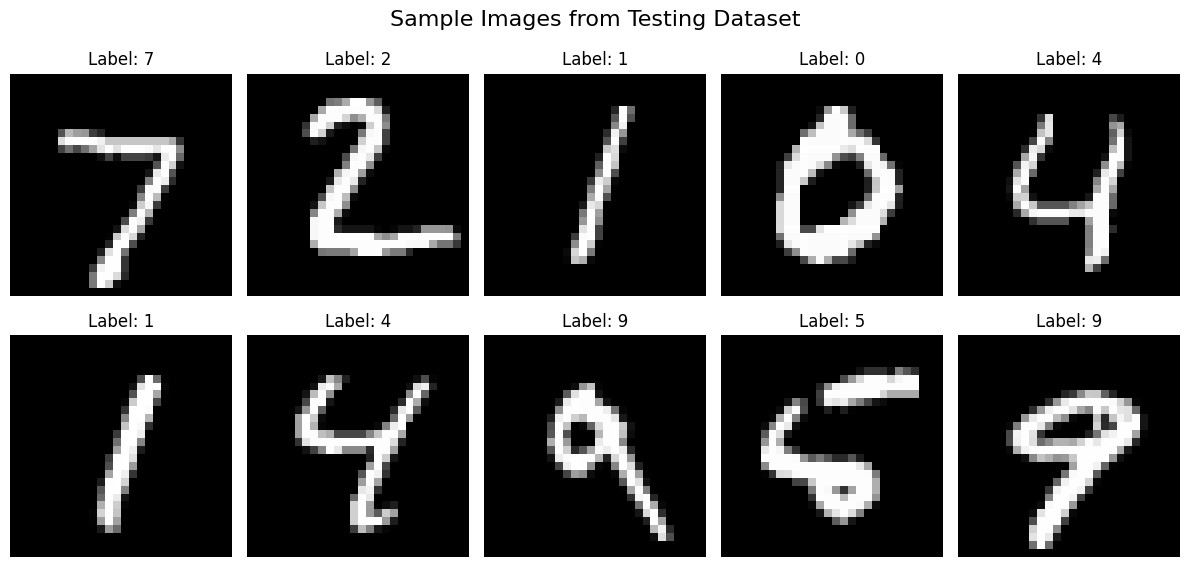

In [ ]:
# Plot sample images from testing dataset

plt.figure(figsize=(12, 6))
plt.suptitle('Sample Images from Testing Dataset', fontsize=16)
for i in range(10):  # Plot 10 samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Reshape data to fit the network input shape
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
# Define ResNet-50 architecture

def residual_block(x, filters, kernel_size=3, strides=1):
  #layer1
    y = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.ReLU()(y)

#layer2
    y = layers.Conv2D(filters, kernel_size, padding='same')(y)
    y = layers.BatchNormalization()(y)

#layer3
    if strides != 1 or x.shape[-1] != filters:
        x = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)

#shortcut
    return layers.ReLU()(layers.add([x, y]))

In [ ]:
def ResNet50(input_shape=(28, 28, 1), num_classes=10):

    inputs = layers.Input(shape=input_shape)
    #stage 1 : conv2D -> batchnormalization -> relu -> maxpool
    x = layers.Conv2D(32, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    #layer 1,2,3
    for filters in [64, 128, 256]:
        strides = 1 if filters == 64 else 2
        x = residual_block(x, filters, strides=strides)
        for _ in range(2):
            x = residual_block(x, filters)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

In [ ]:
# Define hyperparameters
alpha = 0.001
beta = 0.99
batch_size = 32
epochs = 15

In [ ]:
# Split training data into train/validation
validation_split = 0.1
validation_split_index = int(len(x_train) * validation_split)
x_val, y_val = x_train[:validation_split_index], y_train[:validation_split_index]
x_train, y_train = x_train[validation_split_index:], y_train[validation_split_index:]

In [ ]:
# Compile the model
import tensorflow as tf
model = ResNet50()
model.summary()
model.compile(optimizer=tf.keras.optimizers.SGD(lr=alpha, momentum=beta),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 32)           1600      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 14, 14, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 14, 14, 32)           0         ['batch_normalization[0][0

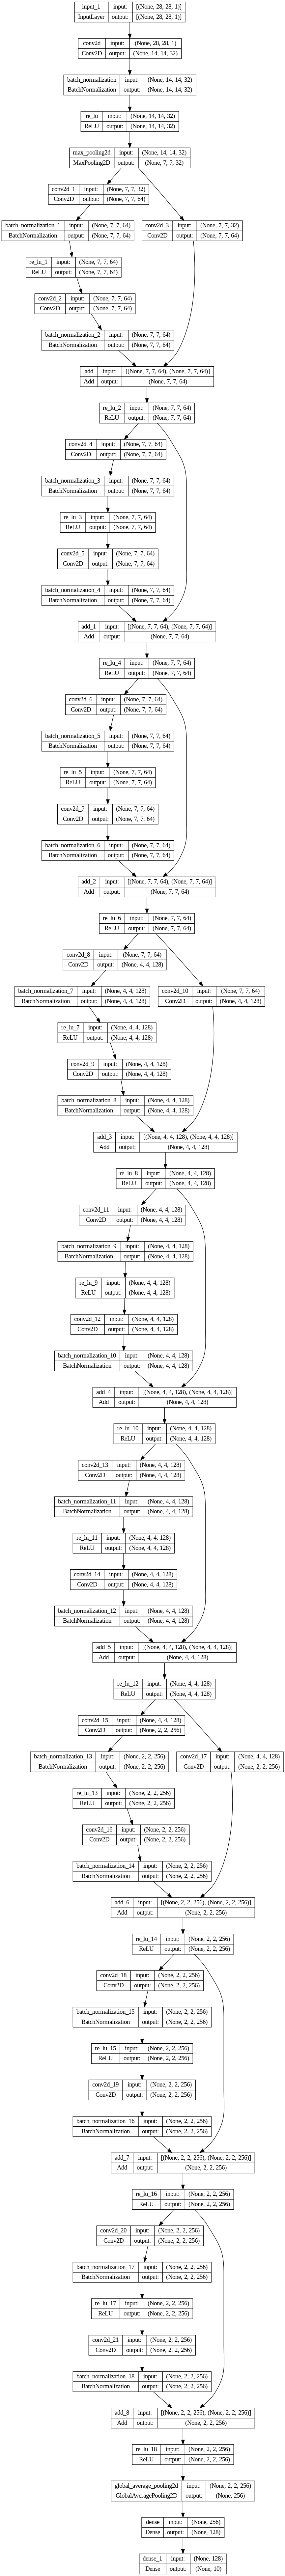

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
# Training loop
for epoch in range(epochs + 1):
    if epoch > 0:
        # Train the model
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1, validation_data=(x_val, y_val), verbose=1)

        # Evaluation
        train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
        val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)

        print(f'Epoch {epoch}:')
        print(f'Training Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}')
        print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}')

1688/1688 [==============================] - 39s 18ms/step - loss: 0.3680 - accuracy: 0.9092 - val_loss: 0.1910 - val_accuracy: 0.9660
Epoch 1:
Training Loss: 0.1918, Accuracy: 0.9622
Validation Loss: 0.1910, Accuracy: 0.9660
1688/1688 [==============================] - 28s 17ms/step - loss: 0.1762 - accuracy: 0.9578 - val_loss: 0.0904 - val_accuracy: 0.9795
Epoch 2:
Training Loss: 0.0804, Accuracy: 0.9788
Validation Loss: 0.0904, Accuracy: 0.9795
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0762 - accuracy: 0.9805 - val_loss: 0.0751 - val_accuracy: 0.9827
Epoch 3:
Training Loss: 0.0587, Accuracy: 0.9851
Validation Loss: 0.0751, Accuracy: 0.9827
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0595 - accuracy: 0.9839 - val_loss: 0.0943 - val_accuracy: 0.9788
Epoch 4:
Training Loss: 0.0778, Accuracy: 0.9793
Validation Loss: 0.0943, Accuracy: 0.9788
1688/1688 [==============================] - 28s 16ms/step - loss: 0.0462 - accuracy: 0.9873 - v

844/844 [==============================] - 26s 19ms/step - loss: 0.2256 - accuracy: 0.9391 - val_loss: 0.1065 - val_accuracy: 0.9738
Epoch 1:
Training Loss: 0.0973, Accuracy: 0.9741
Validation Loss: 0.1065, Accuracy: 0.9738
844/844 [==============================] - 14s 17ms/step - loss: 0.0828 - accuracy: 0.9785 - val_loss: 0.0758 - val_accuracy: 0.9802
Epoch 2:
Training Loss: 0.0675, Accuracy: 0.9813
Validation Loss: 0.0758, Accuracy: 0.9802
844/844 [==============================] - 15s 18ms/step - loss: 0.0553 - accuracy: 0.9848 - val_loss: 0.0893 - val_accuracy: 0.9787
Epoch 3:
Training Loss: 0.0775, Accuracy: 0.9780
Validation Loss: 0.0893, Accuracy: 0.9787
844/844 [==============================] - 16s 19ms/step - loss: 0.0383 - accuracy: 0.9895 - val_loss: 0.0472 - val_accuracy: 0.9868
Epoch 4:
Training Loss: 0.0266, Accuracy: 0.9922
Validation Loss: 0.0472, Accuracy: 0.9868
844/844 [==============================] - 14s 17ms/step - loss: 0.0308 - accuracy: 0.9912 - val_loss: 0

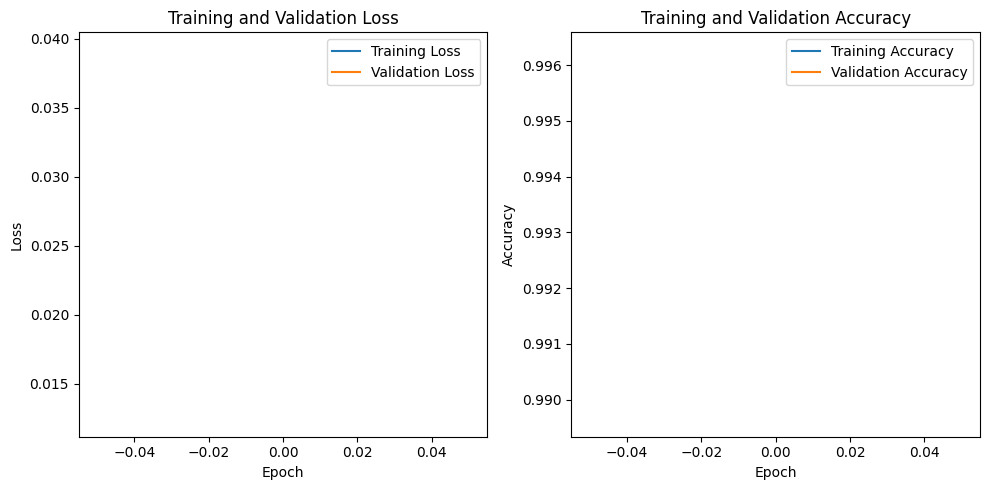

In [ ]:
for epoch in range(epochs + 1):
    if epoch > 0:
        # Train the model
        history = model.fit(x_train, y_train, batch_size=64, epochs=1,
                            validation_data=(x_val, y_val), verbose=1)

        # Evaluation
        train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
        val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)

        print(f'Epoch {epoch}:')
        print(f'Training Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}')
        print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}')

# Plot loss and accuracy curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

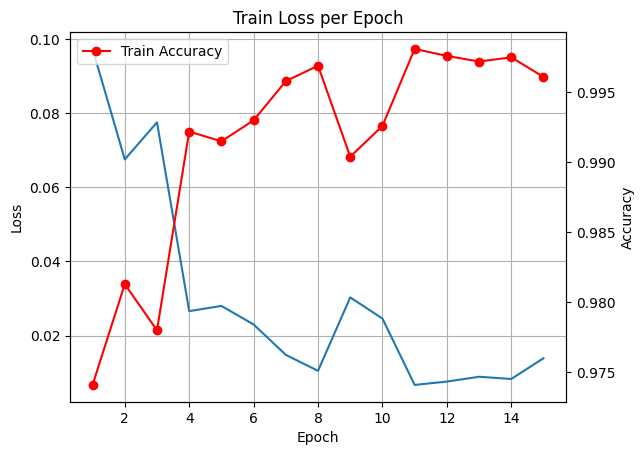

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = range(1, 16)
train_loss = [0.0973, 0.0675, 0.0775, 0.0266, 0.0280, 0.0230, 0.0148, 0.0105, 0.0303, 0.0246, 0.0067, 0.0076, 0.0089, 0.0083, 0.0139]
train_accuracy = [0.9741, 0.9813, 0.9780, 0.9922, 0.9915, 0.9930, 0.9958, 0.9969, 0.9904, 0.9926, 0.9981, 0.9976, 0.9972, 0.9975, 0.9961]

# Plot train loss
plt.plot(epochs, train_loss, label='Train Loss')
plt.title('Train Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot train accuracy on secondary y-axis
plt.twinx()
plt.plot(epochs, train_accuracy, 'ro-', label='Train Accuracy')
plt.ylabel('Accuracy')

# Set labels and legend
plt.legend()
plt.show()


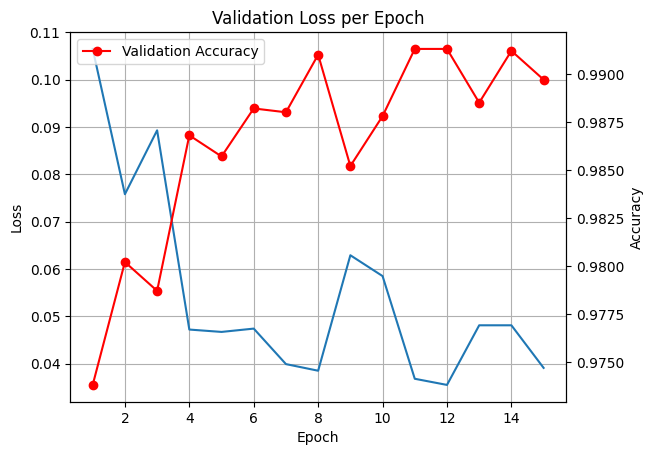

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = range(1, 16)
val_loss = [0.1065, 0.0758, 0.0893, 0.0472, 0.0467, 0.0474, 0.0399, 0.0385, 0.0629, 0.0585, 0.0368, 0.0355, 0.0481, 0.0481, 0.0391]
val_accuracy = [0.9738, 0.9802, 0.9787, 0.9868, 0.9857, 0.9882, 0.9880, 0.9910, 0.9852, 0.9878, 0.9913, 0.9913, 0.9885, 0.9912, 0.9897]
# Plot train loss
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot train accuracy on secondary y-axis
plt.twinx()
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.ylabel('Accuracy')

# Set labels and legend
plt.legend()
plt.show()


In [ ]:
model.save("Num_image_classification.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Predicted class labels (highest probability class)
predicted_labels = np.argmax(predictions, axis=1)

# Displaying some predictions

for i in range(10):
    print("Predicted:", predicted_labels[i], "Actual:", y_test[i])


313/313 [==============================] - 2s 4ms/step
Predicted: 7 Actual: 7
Predicted: 2 Actual: 2
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 4 Actual: 4
Predicted: 1 Actual: 1
Predicted: 4 Actual: 4
Predicted: 9 Actual: 9
Predicted: 5 Actual: 5
Predicted: 9 Actual: 9


313/313 [==============================] - 1s 4ms/step


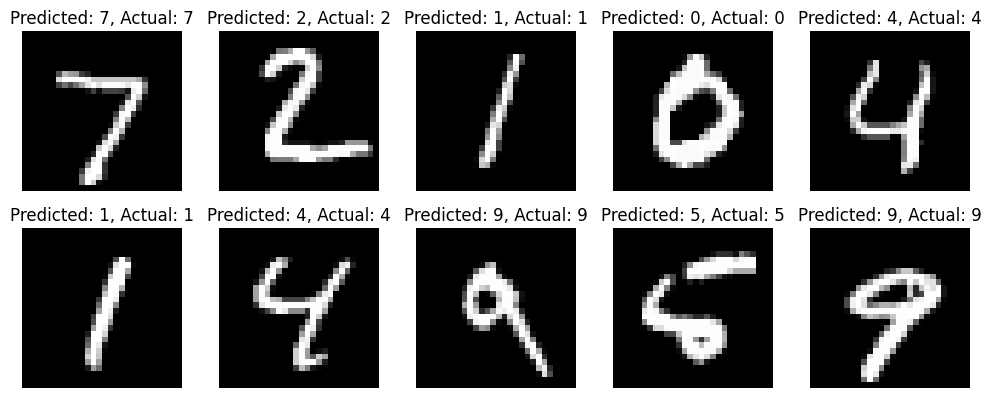

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(x_test)

# Predicted class labels (highest probability class)
predicted_labels = np.argmax(predictions, axis=1)

# Displaying some predictions with images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
# Make predictions on the test set
predictions = model.predict(x_test)

# Predicted class labels (highest probability class)
predicted_labels = np.argmax(predictions, axis=1)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[ 979    0    0    1    0    0    0    0    0    0]
 [   6 1126    0    0    0    0    2    0    1    0]
 [   3    2 1023    1    0    0    0    2    1    0]
 [   0    0    0 1007    0    0    0    0    2    1]
 [   0    0    0    0  970    0    0    0    0   12]
 [   2    0    0    4    0  884    1    0    0    1]
 [   5    2    0    0    1    0  949    0    1    0]
 [   1    3    5    0    1    0    0 1004    1   13]
 [   3    0    2    0    0    0    0    0  968    1]
 [   0    0    0    1    2    0    0    0    1 1005]]


1/1 [==============================] - 0s 19ms/step


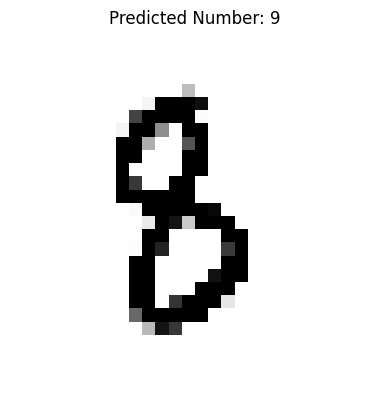

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
input_image_path = "/content/eight.png"
input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to match the input size expected by the model
resized_image = cv2.resize(input_image, (28, 28))

# Normalize the pixel values to be in the range [0, 1]
normalized_image = resized_image / 255.0

# Reshape the image to match the input shape expected by the model
input_data = normalized_image.reshape(1, 28, 28, 1)

# Use the trained model to predict the number
predictions = model.predict(input_data)

# Get the predicted number (index of the class with highest probability)
predicted_number = predictions.argmax()

# Display the input image along with the predicted value
plt.imshow(resized_image, cmap='gray')
plt.title(f"Predicted Number: {predicted_number}")
plt.axis('off')
plt.show()


Test Loss: 0.0359, Test Accuracy: 0.9915
313/313 [==============================] - 3s 8ms/step


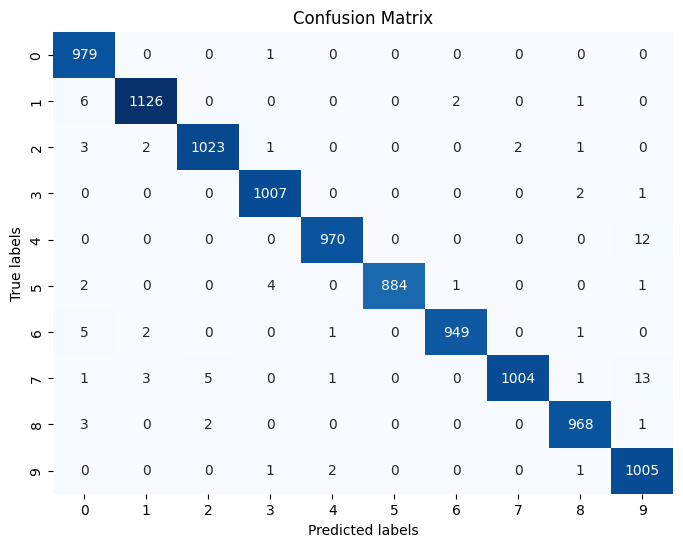

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       1.00      0.99      0.99       982
           5       1.00      0.99      1.00       892
           6       1.00      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.97      1.00      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Accuracy: 0.9915
Precision: 0.9916
Recall: 0.9915
F1-score: 0.9915


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load the trained model
model = tf.keras.models.load_model('Num_image_classification.h5')

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Get predictions on test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


In [ ]:
# Total test accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Total Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 [==============================] - 2s 6ms/step - loss: 0.0530 - accuracy: 0.9853
Total Test Accuracy: 98.53%


Epoch 1:
Test Loss: 0.0530, Test Accuracy: 0.9853
Epoch 2:
Test Loss: 0.0530, Test Accuracy: 0.9853
Epoch 3:
Test Loss: 0.0530, Test Accuracy: 0.9853
Epoch 4:
Test Loss: 0.0530, Test Accuracy: 0.9853
Epoch 5:
Test Loss: 0.0530, Test Accuracy: 0.9853


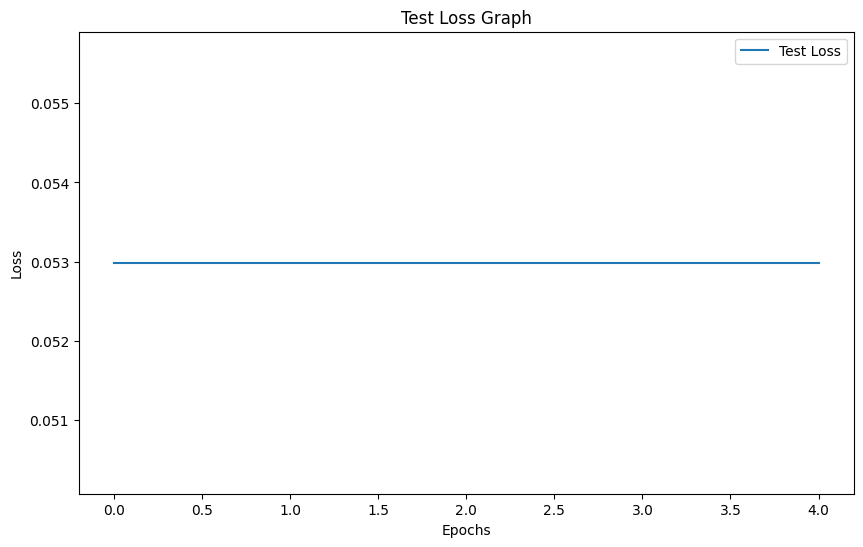

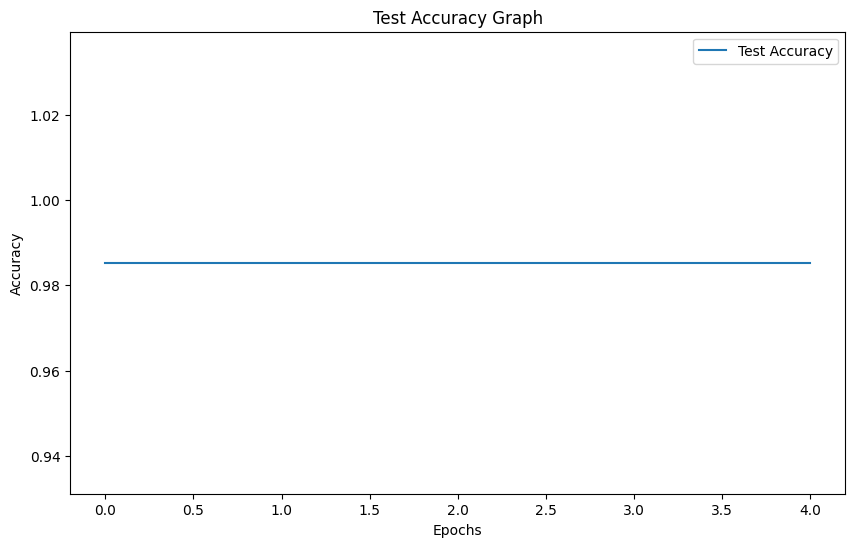

In [ ]:
test_loss_values = []
test_accuracy_values = []

# Testing loop
for epoch in range(epochs):
    # Evaluation on test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    test_loss_values.append(test_loss)
    test_accuracy_values.append(test_acc)

    print(f'Epoch {epoch + 1}:')
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot loss graph for testing data
plt.figure(figsize=(10, 6))
plt.plot(test_loss_values, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss Graph')
plt.legend()
plt.show()

# Plot accuracy graph for testing data
plt.figure(figsize=(10, 6))
plt.plot(test_accuracy_values, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Graph')
plt.legend()
plt.show()
